# Predicting Filipino Family Annual Income

![Filipino Family](https://i.pinimg.com/originals/48/57/fe/4857fe52b8dff06591f9cee34c6d8cef.jpg "Filipino Family")<br>
*Artwork by Dante D. Hipolito*

### Introduction
Every 3 years, the Philippine Statistics Authority (PSA) conducts a nationwide research of family income and expenditure including material consumption.  It also includes demographic information and housing characteristics.  The data collected is used to analyze socioeconomic status of the Filipino people and determine how these factors contribute to existing problems in our society.

### Dataset
The dataset is obtained in this [Kaggle Dataset](https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure).  The data is based from the 2015 Family Income Expenditure Survey by the Philippine Statistics Authority.  With the table size of 41544 rows and 60 columns, it contains features/columns about the family's income, region, expenditures, educational attainment, material belongings, and many more.  For full list of columns, see the code below.  

### The Problem
These following are the reasons why I chose this project:
1. There is a need to incorporate machine learning in analyzing the socioeconomic status of our country.
1. There is an existing gap in determining the annual income of a family based from factors such as demographics, expenses, and material belongings.
1. A standard on what a family should possess based from its annual income is lacking.


### Objectives
The following are the expected outcome of this project:
1. Determine how select factors contribute to the annual income of a family.
1. Clean the data to ensure accuracy and reliability of results.
1. Develop a supervised machine learning model to predict the annual income of a family based on socio-economic factors.


### Install necessary libraries
Uncomment if libraries are not yet installed

In [1]:
# %%capture
# %pip install seaborn
# %pip install pandas
# %pip install numpy
# %pip install sklearn

### Importing libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import time

In [3]:
data = pd.read_csv('assets/Family Income and Expenditure.csv')
data.info(verbose=True)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


## Analysing Data

### Let's try to determine whether expenditures is correlated to net income.
We see that expenditures and income are highly correlated with each other!


Correlation Coefficient:  0.8139746728356914


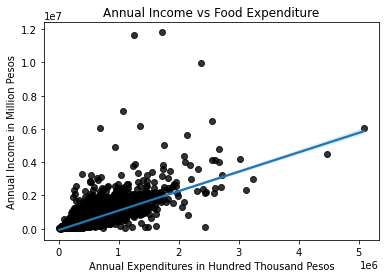

In [4]:
#Combine all expenditures into one column
expenditureColumns = ['Total Food Expenditure',
    'Bread and Cereals Expenditure',
    'Total Rice Expenditure',
    'Meat Expenditure',
    'Total Fish and  marine products Expenditure',
    'Fruit Expenditure',
    'Vegetables Expenditure',
    'Restaurant and hotels Expenditure',
    'Alcoholic Beverages Expenditure',
    'Tobacco Expenditure',
    'Clothing, Footwear and Other Wear Expenditure',
    'Housing and water Expenditure',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Communication Expenditure',
    'Education Expenditure',
    'Miscellaneous Goods and Services Expenditure',	
    'Special Occasions Expenditure',
    'Crop Farming and Gardening expenses'
]

totalExpenses = np.zeros(len(data),dtype='int64')
#print('this' , totalExpenses.shape)
for column in expenditureColumns:
    totalExpenses += data[column]


sns.regplot(x=totalExpenses,y=data['Total Household Income'], scatter_kws={"color":"black"})
plt.title('Annual Income vs Food Expenditure')
plt.ylabel('Annual Income in Million Pesos');
plt.xlabel('Annual Expenditures in Hundred Thousand Pesos');
print('Correlation Coefficient: ', np.corrcoef(x=totalExpenses,y=data['Total Household Income'])[0][1] )

### Educational Attainment

- Column 'Household Head Highest Grade Completed' has a lot of columns, so we have to simplify each categories.
- Graph shows a steady but non-linear increase in annual income as higher education is attained.

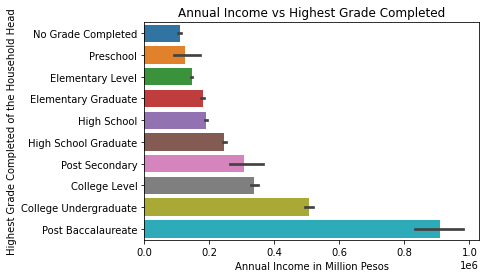

In [5]:
raw_education = data['Household Head Highest Grade Completed'].unique()
education_dictionary = {}
for education in raw_education:
    if education.endswith('Programs'):
        education_dictionary[education] = 'College Undergraduate'
    elif education.startswith('Grade'):
        education_dictionary[education] = 'Elementary Level'
    elif (education.endswith('High School')):
        education_dictionary[education] = 'High School'
    elif (education.endswith('College') or education.startswith('Other Programs')):
        education_dictionary[education] = 'College Level'
    elif (education.endswith('Post Secondary')):
        education_dictionary[education] = 'Post Secondary'
    else:
        education_dictionary[education] = education

mapped_education = data['Household Head Highest Grade Completed'].map(education_dictionary)
education_order = ['No Grade Completed','Preschool','Elementary Level','Elementary Graduate',
    'High School','High School Graduate','Post Secondary','College Level','College Undergraduate',
    'Post Baccalaureate']

sns.barplot(x=data['Total Household Income'],y=mapped_education, order = education_order, orient='h')
#plt.xticks(rotation=90);
plt.title('Annual Income vs Highest Grade Completed')
plt.ylabel('Highest Grade Completed of the Household Head');
plt.xlabel('Annual Income in Million Pesos');

### How about Annual Income of Each Geopolitical Regions?
The graph below shows that the capital region and its adjacent regions tend to have higher annual income; whereas regions with smaller economies such as BARMM have lower annual income. 

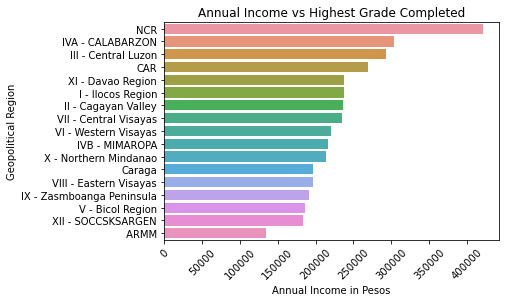

In [6]:
region_grouped = data[['Total Household Income','Region']].groupby('Region').mean().sort_values('Total Household Income', ascending=False)
region_grouped
sns.barplot(x=region_grouped['Total Household Income'],y=region_grouped.index, order = None, orient='h')
plt.title('Annual Income vs Highest Grade Completed')
plt.xticks(rotation=45);
plt.xlabel('Annual Income in Pesos');
plt.ylabel('Geopolitical Region');

### What about, this?
Correlation matrix of numerical features

<AxesSubplot:>

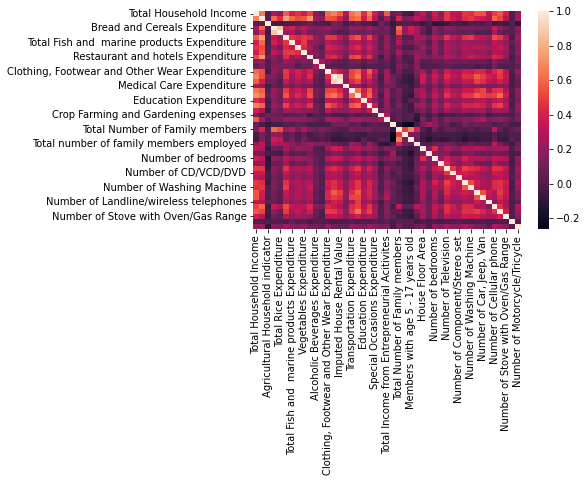

In [7]:
sns.heatmap(data.select_dtypes(include='int').corr())

## Going AI!
### Preprocessing

In [8]:
#Dealing with categorical variables
for col in data.columns:
    if data[col].dtype.name =='object':
        data[col].astype('category')

data = pd.get_dummies(data)
data

#Fill null values
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#Standardize features
scaler = StandardScaler()

#Note that this will be used later, only declared now to see what preprocessing steps were involved


### Train Test Split

In [9]:
X = data.drop('Total Household Income',axis=1)
y = data['Total Household Income']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

### Choosing the Best Model
To determine which model suits the dataset, I've tried using different regressors and use metrics such as time, score, RMSE, and MAE.
Note that only regressors were used since we are dealing with continuous labels -> annual income.

In [10]:
models = [
    ('ExtraTree',ExtraTreeRegressor()),
    ('DecisionTree',DecisionTreeRegressor()),
    ('Lasso',Lasso()),
    ('GradientBoosting',GradientBoostingRegressor()),
    ('Bagging',BaggingRegressor()),
    ('Ridge',Ridge()),
]

model_comparison = pd.DataFrame()
for name,model in models:
    start_time = time.time()
    temp_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    temp_scaler = StandardScaler()
    temp_pipeline = Pipeline(steps=[('imp',temp_imp),('scale',temp_scaler),(name, model)])
    temp_pipeline.fit(X_train,y_train)
    temp_y_pred = temp_pipeline.predict(X_test)

    #Metrics
    temp_exec_time = time.time() - start_time
    temp_score = temp_pipeline.score(X_test,y_test)
    temp_rmse = np.sqrt(mean_squared_error(y_test,temp_y_pred))
    temp_mae = mean_absolute_error(y_test,temp_y_pred)

    model_comparison = model_comparison.append({'Model': name, 'Time': temp_exec_time, 'Score' : temp_score , 'RMSE' : temp_rmse, 'MAE' : temp_mae}, ignore_index=True)
    
model_comparison

#RanndomForestRegressor is also a good candidate, but takes >3.5mins to fit with a default parameters

C:\Users\Francis Mark Cayco\AppData\Local\Temp\ipykernel_8860\1918856490.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({'Model': name, 'Time': temp_exec_time, 'Score' : temp_score , 'RMSE' : temp_rmse, 'MAE' : temp_mae}, ignore_index=True)
C:\Users\Francis Mark Cayco\AppData\Local\Temp\ipykernel_8860\1918856490.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({'Model': name, 'Time': temp_exec_time, 'Score' : temp_score , 'RMSE' : temp_rmse, 'MAE' : temp_mae}, ignore_index=True)
c:\Users\Francis Mark Cayco\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or c

,Model,Time,Score,RMSE,MAE
0,ExtraTree,5.045748,0.641390,167140.734460,76995.573231
1,DecisionTree,7.522937,0.733754,144016.571004,71115.016265
2,Lasso,34.314571,0.861094,104023.678264,52161.989089
3,GradientBoosting,43.271544,0.855117,106238.033111,49711.270395
4,Bagging,20.274456,0.842443,110787.228870,51758.096645
5,Ridge,1.415797,0.861089,104025.253617,52165.241691


### Tuning Hyperparameters
Now that we've determined the best, its time to further optimize the model by tuning its hyperparameters.

In [11]:
from sklearn.model_selection import RandomizedSearchCV

temp_ridge = Ridge()

#Ridge only has one hyperparameter: Alpha
params = {'alpha': np.arange(150,300,1)}
search_cv = RandomizedSearchCV(temp_ridge, params, scoring='r2',n_jobs=-1, n_iter=10)
results = search_cv.fit(X_train,y_train)

print(results.best_score_, results.best_params_)

#Based from the results, the model performs best when alpha is around 187


0.8303792200847073 {'alpha': 179}


### Results and Conclusion

Results for Ridge Regression:
Score:  0.8613127026386226
RMSE:  103941.64388174706
MAE:  52046.65931039314


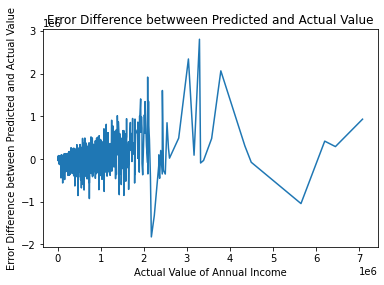

In [12]:
ridge = Ridge(alpha=187)

pipeline = Pipeline(steps=[('imp',imp),('scale',scaler),('ridge', ridge)])
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)


error_df = pd.DataFrame({'true_value':y_test,'error':y_test-y_pred}).sort_values('true_value')
sns.lineplot(x='true_value',y='error',data=error_df)
plt.title('Error Difference betwween Predicted and Actual Value')
plt.xlabel('Actual Value of Annual Income');
plt.ylabel('Error Difference between Predicted and Actual Value');


print("Results for Ridge Regression:")
print("Score: ", pipeline.score(X_test,y_test))
print("RMSE: ", str(np.sqrt(mean_squared_error(y_test,y_pred))))
print("MAE: ", str(mean_absolute_error(y_test,y_pred)))

The main caveat in this model is that it has less accuracy on annual income brackets that have less data (that is, of higher socioeconomic status)

Nevertheless, With a score of 86.13% using Ridge Regression, we can now predict the annual income of a household just by determining their socieconomic livelihood and status.

That ends my machine learning analysis.  Thank you!

Francis Mark M. Cayco
~ PeteCastle